<a href="https://colab.research.google.com/github/ramezanis/notebook/blob/main/predict_classifications(LogReg%2CKNN%2CDT%2CRF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding the objective
The goal is to predict whether the salary for data-related positions, based on location, company reviews, and job title, is satisfactory.

In [83]:
#The goal is to predict data Salary from each position in any location
from google.colab import files

In [84]:
uploaded = files.upload()

Saving df.csv to df (1).csv


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [86]:
df = pd.read_csv('df.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [88]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


In [89]:
# Clean data:
# Create an Average salary column from a Salary Estimate
# Conversat location to state
# Reduce Job title
# Delete negative rows Rating

In [90]:
df = df[df['Salary Estimate']!= '-1']

In [91]:
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [92]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$',' '))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K',' '))

In [93]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

In [94]:
df['Salary Estimate']

,Salary Estimate
0,"[111, -, 181, (Glassdoor, est.)]"
1,"[111, -, 181, (Glassdoor, est.)]"
2,"[111, -, 181, (Glassdoor, est.)]"
3,"[111, -, 181, (Glassdoor, est.)]"
4,"[111, -, 181, (Glassdoor, est.)]"
...,...
5881,"[38, -, 64, (Glassdoor, est.)]"
5882,"[47, -, 89, (Glassdoor, est.)]"
5883,"[66, -, 113, (Glassdoor, est.)]"
5886,"[67, -, 111, (Glassdoor, est.)]"


In [95]:
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[-3])

In [96]:
df['Min_Salary'] = df['Min_Salary'].astype(int)
df['Max_salary'] = df['Max_salary'].apply(lambda x:int(x))
df['Average_Salary'] = (df['Min_Salary']+ df['Max_salary'])/2

In [97]:
df['State'] = df['Location'].apply(lambda x: x.split()[-1])
df = df[df['State']!='Kingdom']

In [98]:
def Job_Stablization(x):
  x = x.lower()
  if ('data science' in x) or ('data scientist' in x):
    return 'data scientist'
  elif 'analyst' in x:
    return 'data analyst'
  elif 'engineer' in x:
    return 'data engineer'
  elif 'manager' in x:
    return 'manager'
  elif 'machine learning' in x:
    return'machine learning engineer'
  elif 'business intelligence' in x:
    return 'BI analyst'
  elif 'architect' in x:
    return 'data architect'
  elif 'supervisor' in x:
    return 'supervisor'
  else:
    return 'other'

In [99]:
df['Job Title'] = df['Job Title'].apply(Job_Stablization)

In [100]:
df = df[df['Rating']!=-1]

In [101]:
df_cleaned = df[['Job Title','Rating','Average_Salary','State']]

In [102]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_Salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


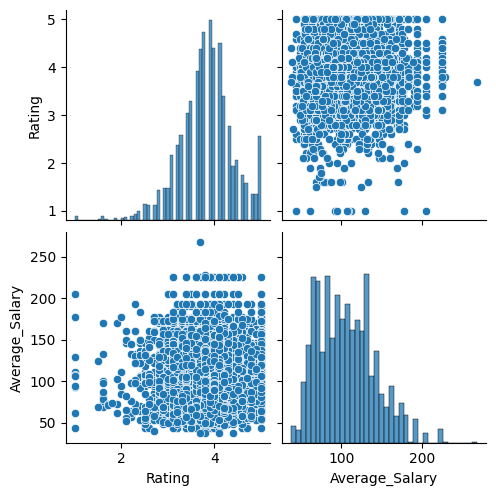

In [103]:
#EDA(Exploratory Data Analysis)
sns.pairplot(df_cleaned)

In [104]:
df_cleaned

,Job Title,Rating,Average_Salary,State
0,data scientist,3.5,146.0,NY
1,data scientist,4.5,146.0,NY
3,data analyst,3.4,146.0,NJ
4,data scientist,3.4,146.0,NY
5,data scientist,2.9,146.0,NY
...,...,...,...,...
5881,other,3.2,51.0,OH
5882,supervisor,4.2,68.0,OH
5883,other,4.0,89.5,OH
5886,data analyst,4.0,89.0,OH


In [105]:
# Future engineering for ML model
preprosses_df = pd.get_dummies(df_cleaned,columns=['Job Title','State'])

In [106]:
preprosses_df

,Rating,Average_Salary,Job Title_data analyst,Job Title_data architect,Job Title_data engineer,Job Title_data scientist,Job Title_machine learning engineer,Job Title_manager,Job Title_other,Job Title_supervisor,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,4.5,146.0,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3.4,146.0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,3.4,146.0,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,2.9,146.0,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5882,4.2,68.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
5883,4.0,89.5,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5886,4.0,89.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [107]:
 preprosses_df['Average_Salary'].median()

102.0

In [108]:
def sat(x):
  if x >= (102):
    return (1)
  else:
    return (0)

In [109]:
preprosses_df['satisfaction'] = preprosses_df['Average_Salary'].apply(sat)

In [110]:
preprosses_df[['satisfaction','Average_Salary']]

,satisfaction,Average_Salary
0,1,146.0
1,1,146.0
3,1,146.0
4,1,146.0
5,1,146.0
...,...,...
5881,0,51.0
5882,0,68.0
5883,0,89.5
5886,0,89.0


In [111]:
x = preprosses_df.drop(columns=['satisfaction','Average_Salary'])
y = preprosses_df['satisfaction']

In [112]:
#Modeling
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [113]:
logreg = LogisticRegression()

In [114]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
prediction = logreg.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 0, 0])

In [116]:
confusion_matrix(y_test,prediction)

array([[521, 201],
       [232, 514]])

In [117]:
len(y_test)

1468

In [118]:
521+201+232+514

1468

In [119]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       722
           1       0.72      0.69      0.70       746

    accuracy                           0.71      1468
   macro avg       0.71      0.71      0.71      1468
weighted avg       0.71      0.71      0.71      1468



In [120]:
accuracy_score(y_test,prediction)

0.7050408719346049

In [121]:
cm = confusion_matrix(y_test,prediction)
cm

array([[521, 201],
       [232, 514]])

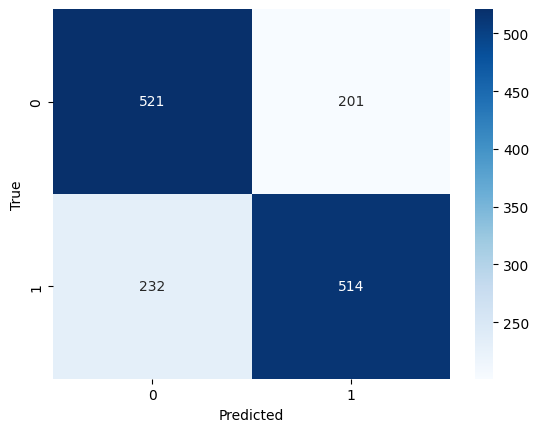

In [122]:
sns.heatmap(data=cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [123]:
roc_curve(y_true=prediction,y_score=y_test)

(array([0.        , 0.30810093, 1.        ]),
 array([0.        , 0.71888112, 1.        ]),
 array([inf,  1.,  0.]))

In [124]:
y_prob = logreg.predict_proba(x_test)[:, 1]

In [125]:
y_prob

array([0.30591001, 0.66216123, 0.30197272, ..., 0.28780307, 0.42611744,
       0.30591001])

In [126]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)

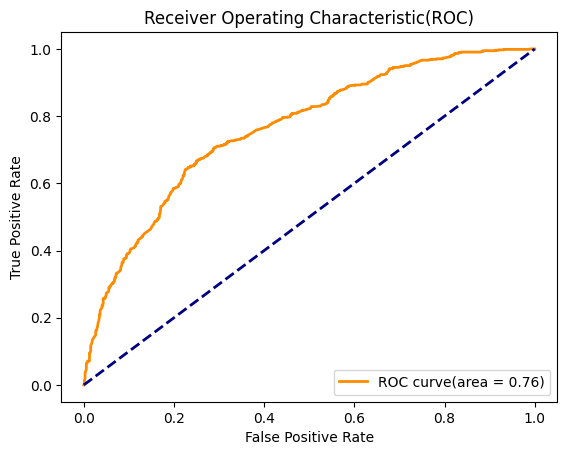

In [127]:
plt.figure()
plt.plot(fpr,tpr, color='darkorange',lw=2,
label=f'ROC curve(area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

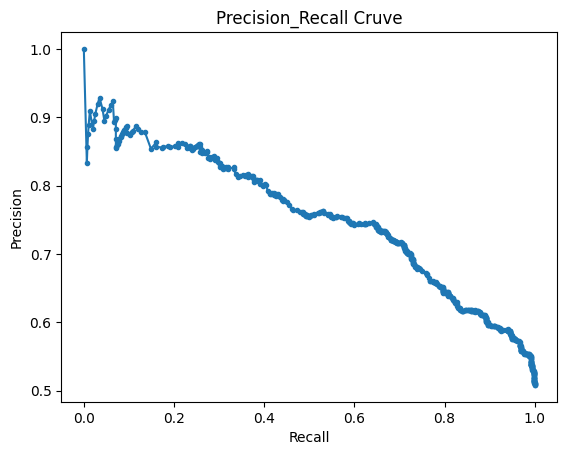

In [128]:
precision,recall,thresholds = precision_recall_curve(y_test,y_prob)
plt.plot(recall,precision,marker = '.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall Cruve')
plt.show()

In [129]:
scores = cross_val_score(logreg, x_train, y_train, cv=5)
print(f'Cross_Validation Accuracy:{scores.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross_Validation Accuracy:0.6938447090963418


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

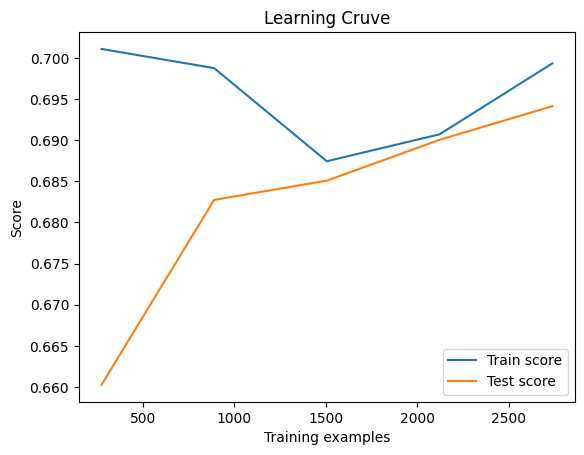

In [130]:
train_sizes,train_scores,test_scores = learning_curve(logreg,x_train,y_train,cv=5)
plt.plot(train_sizes,train_scores.mean(axis=1),label='Train score')
plt.plot(train_sizes,test_scores.mean(axis=1),label='Test score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Cruve')
plt.show()

In [131]:
knn = KNeighborsClassifier()

In [132]:
x = preprosses_df.drop(columns=['satisfaction','Average_Salary'])
y = preprosses_df['satisfaction']

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [134]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [135]:
prediction_knn = knn.predict(x_test)

In [136]:
prediction_knn

array([1, 1, 1, ..., 0, 1, 1])

In [137]:
confusion_matrix(y_test,prediction_knn)

array([[465, 257],
       [250, 496]])

In [138]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       722
           1       0.66      0.66      0.66       746

    accuracy                           0.65      1468
   macro avg       0.65      0.65      0.65      1468
weighted avg       0.65      0.65      0.65      1468



In [139]:
accuracy_score(prediction_knn,y_test)

0.6546321525885559

In [140]:
print(x_train.shape)

(3423, 32)


In [141]:
DT = DecisionTreeClassifier()

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [143]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [144]:
prediction_DT = DT.predict(x_test)

In [145]:
confusion_matrix(prediction_DT,y_test)

array([[499, 272],
       [223, 474]])

In [146]:
print(classification_report(prediction_DT,y_test))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       771
           1       0.64      0.68      0.66       697

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468



In [147]:
accuracy_score(prediction_DT,y_test)

0.6628065395095368

In [151]:
RF = RandomForestClassifier()

In [152]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [153]:
prediction_RF = RF.predict(x_test)
prediction_RF

array([1, 0, 1, ..., 0, 1, 1])

In [154]:
confusion_matrix(prediction_RF,y_test)

array([[472, 238],
       [250, 508]])

In [155]:
466+235+256+511

1468

In [156]:
print(classification_report(prediction_RF,y_test))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       710
           1       0.68      0.67      0.68       758

    accuracy                           0.67      1468
   macro avg       0.67      0.67      0.67      1468
weighted avg       0.67      0.67      0.67      1468



In [157]:
accuracy_score(prediction_RF,y_test)

0.667574931880109

In [158]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1468 entries, 4607 to 4704
Series name: satisfaction
Non-Null Count  Dtype
--------------  -----
1468 non-null   int64
dtypes: int64(1)
memory usage: 22.9 KB


In [161]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 4607 to 4704
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rating                               1468 non-null   float64
 1   Job Title_data analyst               1468 non-null   bool   
 2   Job Title_data architect             1468 non-null   bool   
 3   Job Title_data engineer              1468 non-null   bool   
 4   Job Title_data scientist             1468 non-null   bool   
 5   Job Title_machine learning engineer  1468 non-null   bool   
 6   Job Title_manager                    1468 non-null   bool   
 7   Job Title_other                      1468 non-null   bool   
 8   Job Title_supervisor                 1468 non-null   bool   
 9   State_AZ                             1468 non-null   bool   
 10  State_CA                             1468 non-null   bool   
 11  State_DC                        